In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Calculate the Hidden Layer's Output

Inputs:
- Input vector $X = [1, 0]$
- Weight matrix $H1 = \begin{bmatrix}1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \end{bmatrix}$
- Bias vector $B1 = [0.15, 0.15, 0.15, 0.15]$

Weighted sum:

$
Z = X \cdot H1 + B1
$

Plugged in:

$$
Z = [1, 0] \cdot \begin{bmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \end{bmatrix} + [0.15, 0.15, 0.15, 0.15]
$$

$$
Z = [1 \cdot 1 + 0 \cdot 0, 1 \cdot 0 + 0 \cdot 1, 1 \cdot 1 + 0 \cdot 0, 1 \cdot 0 + 0 \cdot 1] + [0.15, 0.15, 0.15, 0.15]
$$

$$
Z = [1, 0, 1, 0] + [0.15, 0.15, 0.15, 0.15]
$$

$$
Z = [1.15, 0.15, 1.15, 0.15]
$$

Activation function:

$
A = tanh(Z)
$

$$
A = tanh([1.15, 0.15, 1.15, 0.15])
$$

$$
A \approx [0.818, 0.149, 0.818, 0.149]
$$

### Calculate the Output Neuron's Value

Inputs:
- Hidden layer output $A = [0.818, 0.149, 0.818, 0.149]$
- Weight matrix $H2 = [1, 1, 0, 1.5]$
- Bias $B2 = 0$

Weighted sum:

$
Z_{output} = A \cdot H2 + B2
$

Plugged in:

$$
Z_{output} = [0.818, 0.149, 0.818, 0.149] \cdot [1, 1, 0, 1.5] + 0
$$

$$
Z_{output} = 0.818 \cdot 1 + 0.149 \cdot 1 + 0.818 \cdot 0 + 0.149 \cdot 1.5
$$

$$
Z_{output} \approx 1.190
$$

Final output:

$
Y = tanh(Z_{output})
$

$$
Y = tanh(1.190)
$$

$$
Y \approx 0.831
$$

In [12]:
input_vector = np.array([1, 0])
H1 = np.array([[1, 0, 1, 0], [0, 1, 0, 1]])
B1 = np.array([0.15, 0.15, 0.15, 0.15])
H2 = np.array([1, 1, 0, 1.5])
B2 = 0

# Calculate hidden sum weight
weighted_sum = np.dot(input_vector, H1) + B1

# Calculate activation function
tanh_activation = np.tanh(weighted_sum)

# Calculate weighted sum Z for the output neuron
Z_output = np.dot(tanh_activation, H2) + B2

# Final output after applying activation function
output_neuron = np.tanh(Z_output)

print("Final output (Y) =", output_neuron)


Final output (Y) = 0.8305685288556741


### Calculate the Loss Function (MSE)

Inputs:

- Expected output $Y_{expected} = 1$
- Actual output $Y_{actual} = 0.831$
- Learning rate $\alpha = 10$

Mean Squared Error (MSE):

$
MSE = \frac{1}{2}(Y_{expected} - Y_{actual})^2
$

$$
MSE = \frac{1}{2}(1 - 0.831)^2
$$

### Calculate the Gradient of the Loss Function & Activation Function Derivative

Gradient of the MSE loss with respect to $Y_{actual}$:

$
\frac{\partial MSE}{\partial Y_{actual}} = -(Y_{expected} - Y_{actual})
$

Derivative of $\tanh$:

$
\frac{\partial Y_{actual}}{\partial Z_{output}} = 1 - \tanh^2(Z_{output})
$

### Calculate the Gradients of the Weights and Bias (Backpropagation)

Gradient of the loss function with respect to the weights $H2$:

$
\frac{\partial MSE}{\partial H2} = \frac{\partial MSE}{\partial Y_{actual}} \cdot \frac{\partial Y_{actual}}{\partial Z_{output}} \cdot \frac{\partial Z_{output}}{\partial H2}
$

Gradient of the loss function with respect to the bias $B2$:

$
\frac{\partial MSE}{\partial B2} = \frac{\partial MSE}{\partial Y_{actual}} \cdot \frac{\partial Y_{actual}}{\partial Z_{output}} \cdot \frac{\partial Z_{output}}{\partial B2}
$

### Update the Weights and Bias

$
H2_{new} = H2 - \alpha \cdot \frac{\partial MSE}{\partial H2}
$

$
B2_{new} = B2 - \alpha \cdot \frac{\partial MSE}{\partial B2}
$

$$
H2_{new} = [1.741, 1.135, 0.741, 1.635]
$$

$$
B2_{new} = 0.906
$$

In [13]:
Y_expected = 1
Y_actual = 0.831
A = np.array([0.818, 0.149, 0.818, 0.149])
H2 = np.array([1, 1, 0, 1.5])
B2 = 0
learning_rate = 10

# Calculate the gradient of the MSE loss
loss_gradient = -(Y_expected - Y_actual)

# Calculate the derivative of tanh
tanh_derivative = 1 - np.tanh(Y_actual)**2

# Gradients of H2 and B2
weights_gradient = loss_gradient * tanh_derivative * A
bias_gradient = loss_gradient * tanh_derivative * 1

# Update H2 and B2
H2_output = H2 - learning_rate * weights_gradient
B2_output = B2 - learning_rate * bias_gradient

print("H2 Output =", H2_output)
print("B2 Output =", B2_output)

H2 Output = [1.74128381 1.13502602 0.74128381 1.63502602]
B2 Output = 0.9062149229462757


In [14]:
from nnet import Network, FCLayer, ActivationLayer, relu, relu_derivative, sigmoid, sigmoid_derivative, tanh, tanh_derivative, initialize_weights_bias

In [15]:
# FCLayer Unit Test

def test_fc_layer_forward_backward():

    weights = np.array([[0.5], [0.5]])
    bias = np.array([[0.1]])
    input_data = np.array([[1, 2]])
    loss_gradient = np.array([[0.5]])

    # Initialize FCLayer layer
    fc_layer = FCLayer(weights, bias)

    # Calculate expected forward output
    expected_output = np.dot(input_data, fc_layer.weights) + fc_layer.bias

    # Calcuate forward propagation
    output = fc_layer.forward_propagation(input_data)

    # Calculate expected backward gradient output
    expected_weights_gradient = np.dot(input_data.T, loss_gradient)
    expected_bias_gradient = loss_gradient.copy()
    expected_input_error = np.dot(loss_gradient, fc_layer.weights.T)
    
    # Calculate backward propagation
    input_error = fc_layer.backward_propagation(loss_gradient, learning_rate=0.01)

    # Compare forward propagation with expected output
    np.testing.assert_array_almost_equal(output, expected_output, err_msg="Forward pass failed")
    
    # Compare backward propagation with expected output
    np.testing.assert_array_almost_equal(fc_layer.weights_gradient, expected_weights_gradient, decimal=2, err_msg="Weights gradient incorrect")
    np.testing.assert_array_almost_equal(fc_layer.bias_gradient, expected_bias_gradient, decimal=2, err_msg="Bias gradient incorrect")
    np.testing.assert_array_almost_equal(input_error, expected_input_error, decimal=2, err_msg="Input error incorrect")

test_fc_layer_forward_backward()

In [16]:
# Direct test of FCLayer

weights = np.array([[0.5, -0.2, 0.1], [0.1, -1.0, 0.4]])
bias = np.array([[0.0, 0.5, -0.3]])

test_layer = FCLayer(weights, bias)

test_input = np.array([[0.2, 0.3]])
test_output = test_layer.forward_propagation(test_input)
print("Direct FCLayer output:", test_output)

Direct FCLayer output: [[ 0.13  0.16 -0.16]]


In [17]:
# ActivationLayer Unit Test

def test_activation_layer_forward_backward():

    input_data = np.array([[-1, 0, 1]])

    # Initialize ActivationLayer with ReLU
    activation_layer = ActivationLayer(activation_function=relu, activation_derivative=relu_derivative)
    
    # Calculate expected forward output
    expected_forward_output = relu(input_data)
    
    # Calculate forward propagation
    forward_output = activation_layer.forward_propagation(input_data)
    
    # Calculate expected backward gradient output
    loss_gradient = np.array([[0.5, 1.0, 1.5]])
    expected_backward_output = loss_gradient * relu_derivative(input_data)
    
    # Calculate backward propagation
    backward_output = activation_layer.backward_propagation(loss_gradient, learning_rate)

    # Compare forward propagation with expected output
    np.testing.assert_array_almost_equal(forward_output, expected_forward_output, err_msg="Forward pass failed")
    
    # Compare backward propagation with expected output
    np.testing.assert_array_almost_equal(backward_output, expected_backward_output, err_msg="Backward pass failed")

test_activation_layer_forward_backward()

In [18]:
# Direct test of ActivationLayer with ReLu

test_layer = ActivationLayer(activation_function=relu, activation_derivative=relu_derivative)

test_input = np.array([[0.2, 0.3], [-0.1, -0.2]])
test_output = test_layer.forward_propagation(test_input)

print("Direct ActivationLayer output:", test_output)

Direct ActivationLayer output: [[0.2 0.3]
 [0.  0. ]]


In [19]:
# Direct test of Network with [1, 0]

network = Network()

H1 = np.array([[1, 0, 1, 0], [0, 1, 0, 1]])
B1 = np.array([[0.15, 0.15, 0.15, 0.15]])

H2 = np.array([[1, 1, 0, 1.5]]).T
B2 = np.array([[0]])

network.add(FCLayer(H1, B1))
network.add(ActivationLayer(tanh, tanh_derivative))
network.add(FCLayer(H2, B2))
network.add(ActivationLayer(tanh, tanh_derivative))
print(network.layers)

test_input = np.array([[1, 0]])

output = network.predict(test_input)
print("Network output:", output)


[FCLayer, ActivationLayer, FCLayer, ActivationLayer]
Network output: [[0.83056853]]


[[[0.45794718]]

 [[0.46121693]]

 [[0.46276814]]

 [[0.46619698]]]
Epoch 1/1000, Training Error: 0.23900472310455603, Validation Loss: 0.2911795048561279
Epoch 101/1000, Training Error: 0.22737173032305233, Validation Loss: 0.35825322659879405
Epoch 201/1000, Training Error: 0.22399396069585634, Validation Loss: 0.39492782082999645
Epoch 301/1000, Training Error: 0.22266746182259603, Validation Loss: 0.41567132917529315
Epoch 401/1000, Training Error: 0.22189403708811542, Validation Loss: 0.42807471093262184
Epoch 501/1000, Training Error: 0.2212712228168543, Validation Loss: 0.436012851212528
Epoch 601/1000, Training Error: 0.22067925799245605, Validation Loss: 0.4415309013888087
Epoch 701/1000, Training Error: 0.22007811622178605, Validation Loss: 0.44574420947562515
Epoch 801/1000, Training Error: 0.21945156755332618, Validation Loss: 0.44927685380770904
Epoch 901/1000, Training Error: 0.21879065031477693, Validation Loss: 0.45248597766103527


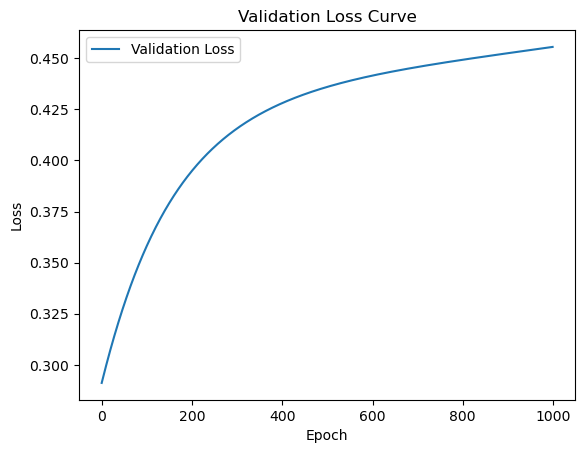

In [20]:
# Test of Network fit & Validation Loss Curve

H1, B1 = initialize_weights_bias(2, 3)
H2, B2 = initialize_weights_bias(3, 1)

network = Network()
network.add(FCLayer(H1, B1))
network.add(ActivationLayer(sigmoid, sigmoid_derivative))
network.add(FCLayer(H2, B2))
network.add(ActivationLayer(sigmoid, sigmoid_derivative))

x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

out = network.predict(x_train)
print(out)
    
network.fit(X_train, y_train, X_val, y_val, epochs=1000, learning_rate=0.01)

plt.plot(network.validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Curve')
plt.legend()
plt.show()

/Users/roneng100/Downloads/HW4:5/nnet.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-input_data))


Epoch 1/10, Training Error: 0.42813773439613956, Validation Loss: 0.4882414099013125
Epoch 2/10, Training Error: 0.38803679593004303, Validation Loss: 0.418874169813595
Epoch 3/10, Training Error: 0.3625394730038167, Validation Loss: 0.41887416981034264
Epoch 4/10, Training Error: 0.3625394730027164, Validation Loss: 0.4188741698071474
Epoch 5/10, Training Error: 0.3625394730016362, Validation Loss: 0.41887416980401204
Epoch 6/10, Training Error: 0.36253947300057554, Validation Loss: 0.41887416980093095
Epoch 7/10, Training Error: 0.36253947299953393, Validation Loss: 0.4188741697979028
Epoch 8/10, Training Error: 0.3625394729985111, Validation Loss: 0.41887416979492764
Epoch 9/10, Training Error: 0.3625394729975055, Validation Loss: 0.41887416979200515
Epoch 10/10, Training Error: 0.36253947299651806, Validation Loss: 0.41887416978913394


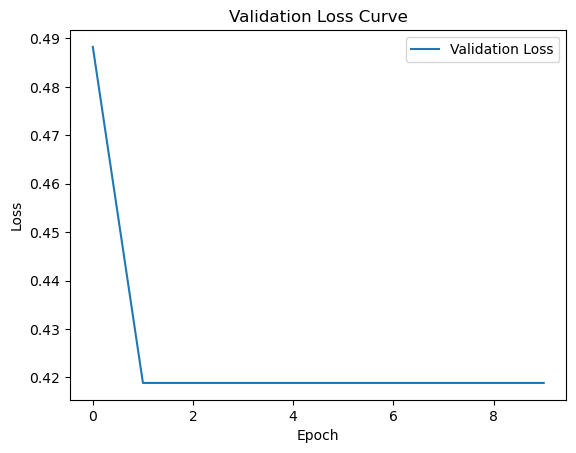

In [21]:
# Test of Network on Heart Rate Stressed/Not Stressed Data

n_samples = 1000
np.random.seed(42)

# Stressed class parameters
mu_stress = [120, 35]
sigma_stress = np.array([[1, 0], [0, 1]])

# Not stressed class parameters
mu_not_stress = [60, 50]
sigma_not_stress = np.array([[1, 1], [1, 1]])

# Generate samples for each class
stress_samples = np.random.multivariate_normal(mu_stress, sigma_stress, n_samples)
not_stress_samples = np.random.multivariate_normal(mu_not_stress, sigma_not_stress, n_samples)

# Label data 0 and 1
labels_stress = np.ones((n_samples, 1))
labels_not_stress = np.zeros((n_samples, 1))

# Combine samples and labels
X = np.vstack((stress_samples, not_stress_samples))
y = np.vstack((labels_stress, labels_not_stress))

# Split into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

net = Network()
input_size = 2
hidden_layer_size = 3
output_size = 1

# Initialize weights and biases
weights1, bias1 = initialize_weights_bias(input_size, hidden_layer_size)
weights2, bias2 = initialize_weights_bias(hidden_layer_size, output_size)

net.add(FCLayer(weights1, bias1))
net.add(ActivationLayer(sigmoid, sigmoid_derivative))
net.add(FCLayer(weights2, bias2))
net.add(ActivationLayer(sigmoid, sigmoid_derivative))

net.fit(X_train, y_train, X_val, y_val, epochs=10, learning_rate=10)

plt.plot(net.validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Curve')
plt.legend()
plt.show()


***a)*** The learning rate in gradient descent determines the size of steps taken towards the global minimum of the loss function. If the learning rate is too slow, it could get stuck at a local minimum and never reach the desired outcome. Coincidently, it could also take a long time to reach the global minimum. If the learning rate is too large it could overshoot and never converge on the global minimum.

***b)*** AdaGrad adjusts the learning rate for each parameter to give parameters with infrequend updates a larger learning rate and parameters with frequent updates smaller learning rates. AdaGrad modifies the learning rate n at each step t for every parameter θ_i
$$
\theta_{t+1,i} = \theta_{t,i} - \frac{\eta}{\sqrt{G_{t,ii} + \epsilon}} \cdot g_{t,i}
$$
However, because it reduces the learning rate for frequently occurring features, accumulating squared gradients in the denominator continously decreases the learning rate, eventually becoming too small.

RMSprop fixes this issue by adding a decay factor to the denominator. The algorithm maintains a moving average of past square gradients and prevents the learning rate from becoming too small.
$$
E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta)g_t^2
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
$$
$ E[g^2]_t$ is the exponentially decaying average of the squared gradients and B is the decay rate. This allows RMSprop to give learning rates that adapt to recent gradients unlike AdaGrad that takes a squared accumulation of all gradients.


***c)*** The Adam optimizer is an optimization algorithm that combines properties from AdaGrad and RMSprop that can better handle sparse gradients on noisy data. The algorithm maintains a moving average for the gradients (like RMSProp) and another for the square of the gradients (like AdaGrad) using both to update the parameter at each step. The optimizer estimates the mean and uncentered variance of the gradients to change the learning rates which allows the movement to take into account both the average direction and variance estimation. The emphasis on these factors allows the Adam optimizer to tune parameters efficiently towards the next step which in the context of sparse noisy gradients can be much more difficult to find with other optimizaiton algorithms.

***d)*** Bagging and boosting are ensemble techniques that aim to improve model performance by combining outputs of multiple models. Bagging reduces variance without increasing bias. This method generates multiple models with replacement of data from the orginal dataset, then determines the final output by an average ouputs for regression or majority voting for classification. Decision trees are prone to variance which benefits greatly from bagging as the technique smooths out decision boundries and decreases overfitting. Unlike bagging, boosting does the opposite by focusesing on reducing bias. This method generates model in sequence that attempt to correct errors at each new model. Data points that were previously misclassified are given more weight in the subsequent model which emphasizes the models likliness to correctly predict the data point. Decision trees that have high bias (often shallow trees) benefit from this method as the subsequential learning helps reduce the errors that are hardest to classify through each iteration of a new model.

***e)*** Gradient boosting is another ensemble technique that builds on the concept of booting to guide the learning process of a model. The method starts with a base model that predicts the target values. Then, subseuential iterations are trained on the gradient of the loss function which is the steepest path towards the gloabl minimum. During the process the gradient of the loss function is calcualted from the previous model with respect to the predictions to indicate how to adjust the learning rate. The learning rate scales the contribution of the subsequent models to prevent overfitting. The learning rate forces gradient boosting to take smaller steps towards the global minimum requiring more models to produce a higher accuracy. Each new model added to the ensembe is summed together to find the best fit to the data and minimize the loss function.

***f)*** Neural networks are prone to overfitting because of their high capacity potential and their ability to fit complex patterns in data. Networks can accomidate a large number of parameters and layers which enables them to create intricate network relationships. These relationships capture meaningful underlying patterns but also account for all noise in the data. This is be problematic for unseen data and requires regularization techniques to prevent the model from overfitting to the data too closely. Insufficient amounts and lack of quality data can also contribute to overfitting. Techniques like L1/L2, dropout, or early stoppage can fine-tune a model to better handle unseen data but preemptive methods like data augmentation and ensuring a diverse large training set are also crucial. 